In [3]:
import pandas as pd

In [5]:
df=pd.read_csv('car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.shape

(4340, 8)

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [11]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
df_final = df.drop('name',axis=1)

In [13]:
df_final.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
df_final['current_year'] = 2023

In [15]:
df_final.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023


In [16]:
df_final['no_of_years'] = df_final['current_year'] - df_final['year']
df_final.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023,16
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023,16
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023,11
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023,6
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023,9


In [17]:
df_final = df_final.drop(['year','current_year'],axis=1)

In [18]:
df_final.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [19]:
df_final['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [21]:
df[df['owner']=='Test Drive Car'].count()

name             17
year             17
selling_price    17
km_driven        17
fuel             17
seller_type      17
transmission     17
owner            17
dtype: int64

In [22]:
owner_map = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':1}

In [23]:
df_final['owner'] = df_final['owner'].map(owner_map)

In [24]:
df_final.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,Petrol,Individual,Manual,1,16
1,135000,50000,Petrol,Individual,Manual,1,16
2,600000,100000,Diesel,Individual,Manual,1,11
3,250000,46000,Petrol,Individual,Manual,1,6
4,450000,141000,Diesel,Individual,Manual,2,9


In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  4340 non-null   int64 
 1   km_driven      4340 non-null   int64 
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   int64 
 6   no_of_years    4340 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 237.5+ KB


In [29]:
df_final = pd.get_dummies(df_final,drop_first=True)   

In [30]:
df_final.head()

,selling_price,km_driven,owner,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,16,False,False,False,True,True,False,True
1,135000,50000,1,16,False,False,False,True,True,False,True
2,600000,100000,1,11,True,False,False,False,True,False,True
3,250000,46000,1,6,False,False,False,True,True,False,True
4,450000,141000,2,9,True,False,False,False,True,False,True


In [31]:
df_final = df_final.astype(int)
df_final.head()

,selling_price,km_driven,owner,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,16,0,0,0,1,1,0,1
1,135000,50000,1,16,0,0,0,1,1,0,1
2,600000,100000,1,11,1,0,0,0,1,0,1
3,250000,46000,1,6,0,0,0,1,1,0,1
4,450000,141000,2,9,1,0,0,0,1,0,1


In [32]:
df_final.corr()

,selling_price,km_driven,owner,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
selling_price,1.000000,-0.192289,-0.225470,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205
km_driven,-0.192289,1.000000,0.316860,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226
owner,-0.225470,0.316860,1.000000,0.463687,-0.003152,0.011792,0.029761,-0.007373,0.258249,-0.090358,0.084651
no_of_years,-0.413922,0.419688,0.463687,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800
fuel_Diesel,0.282947,0.285396,-0.003152,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098
fuel_Electric,-0.005095,-0.001372,0.011792,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746
fuel_LPG,-0.042434,0.036652,0.029761,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764
fuel_Petrol,-0.269453,-0.291139,-0.007373,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614
seller_type_Individual,-0.236798,0.182663,0.258249,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.090358,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346


In [34]:
import seaborn as sns

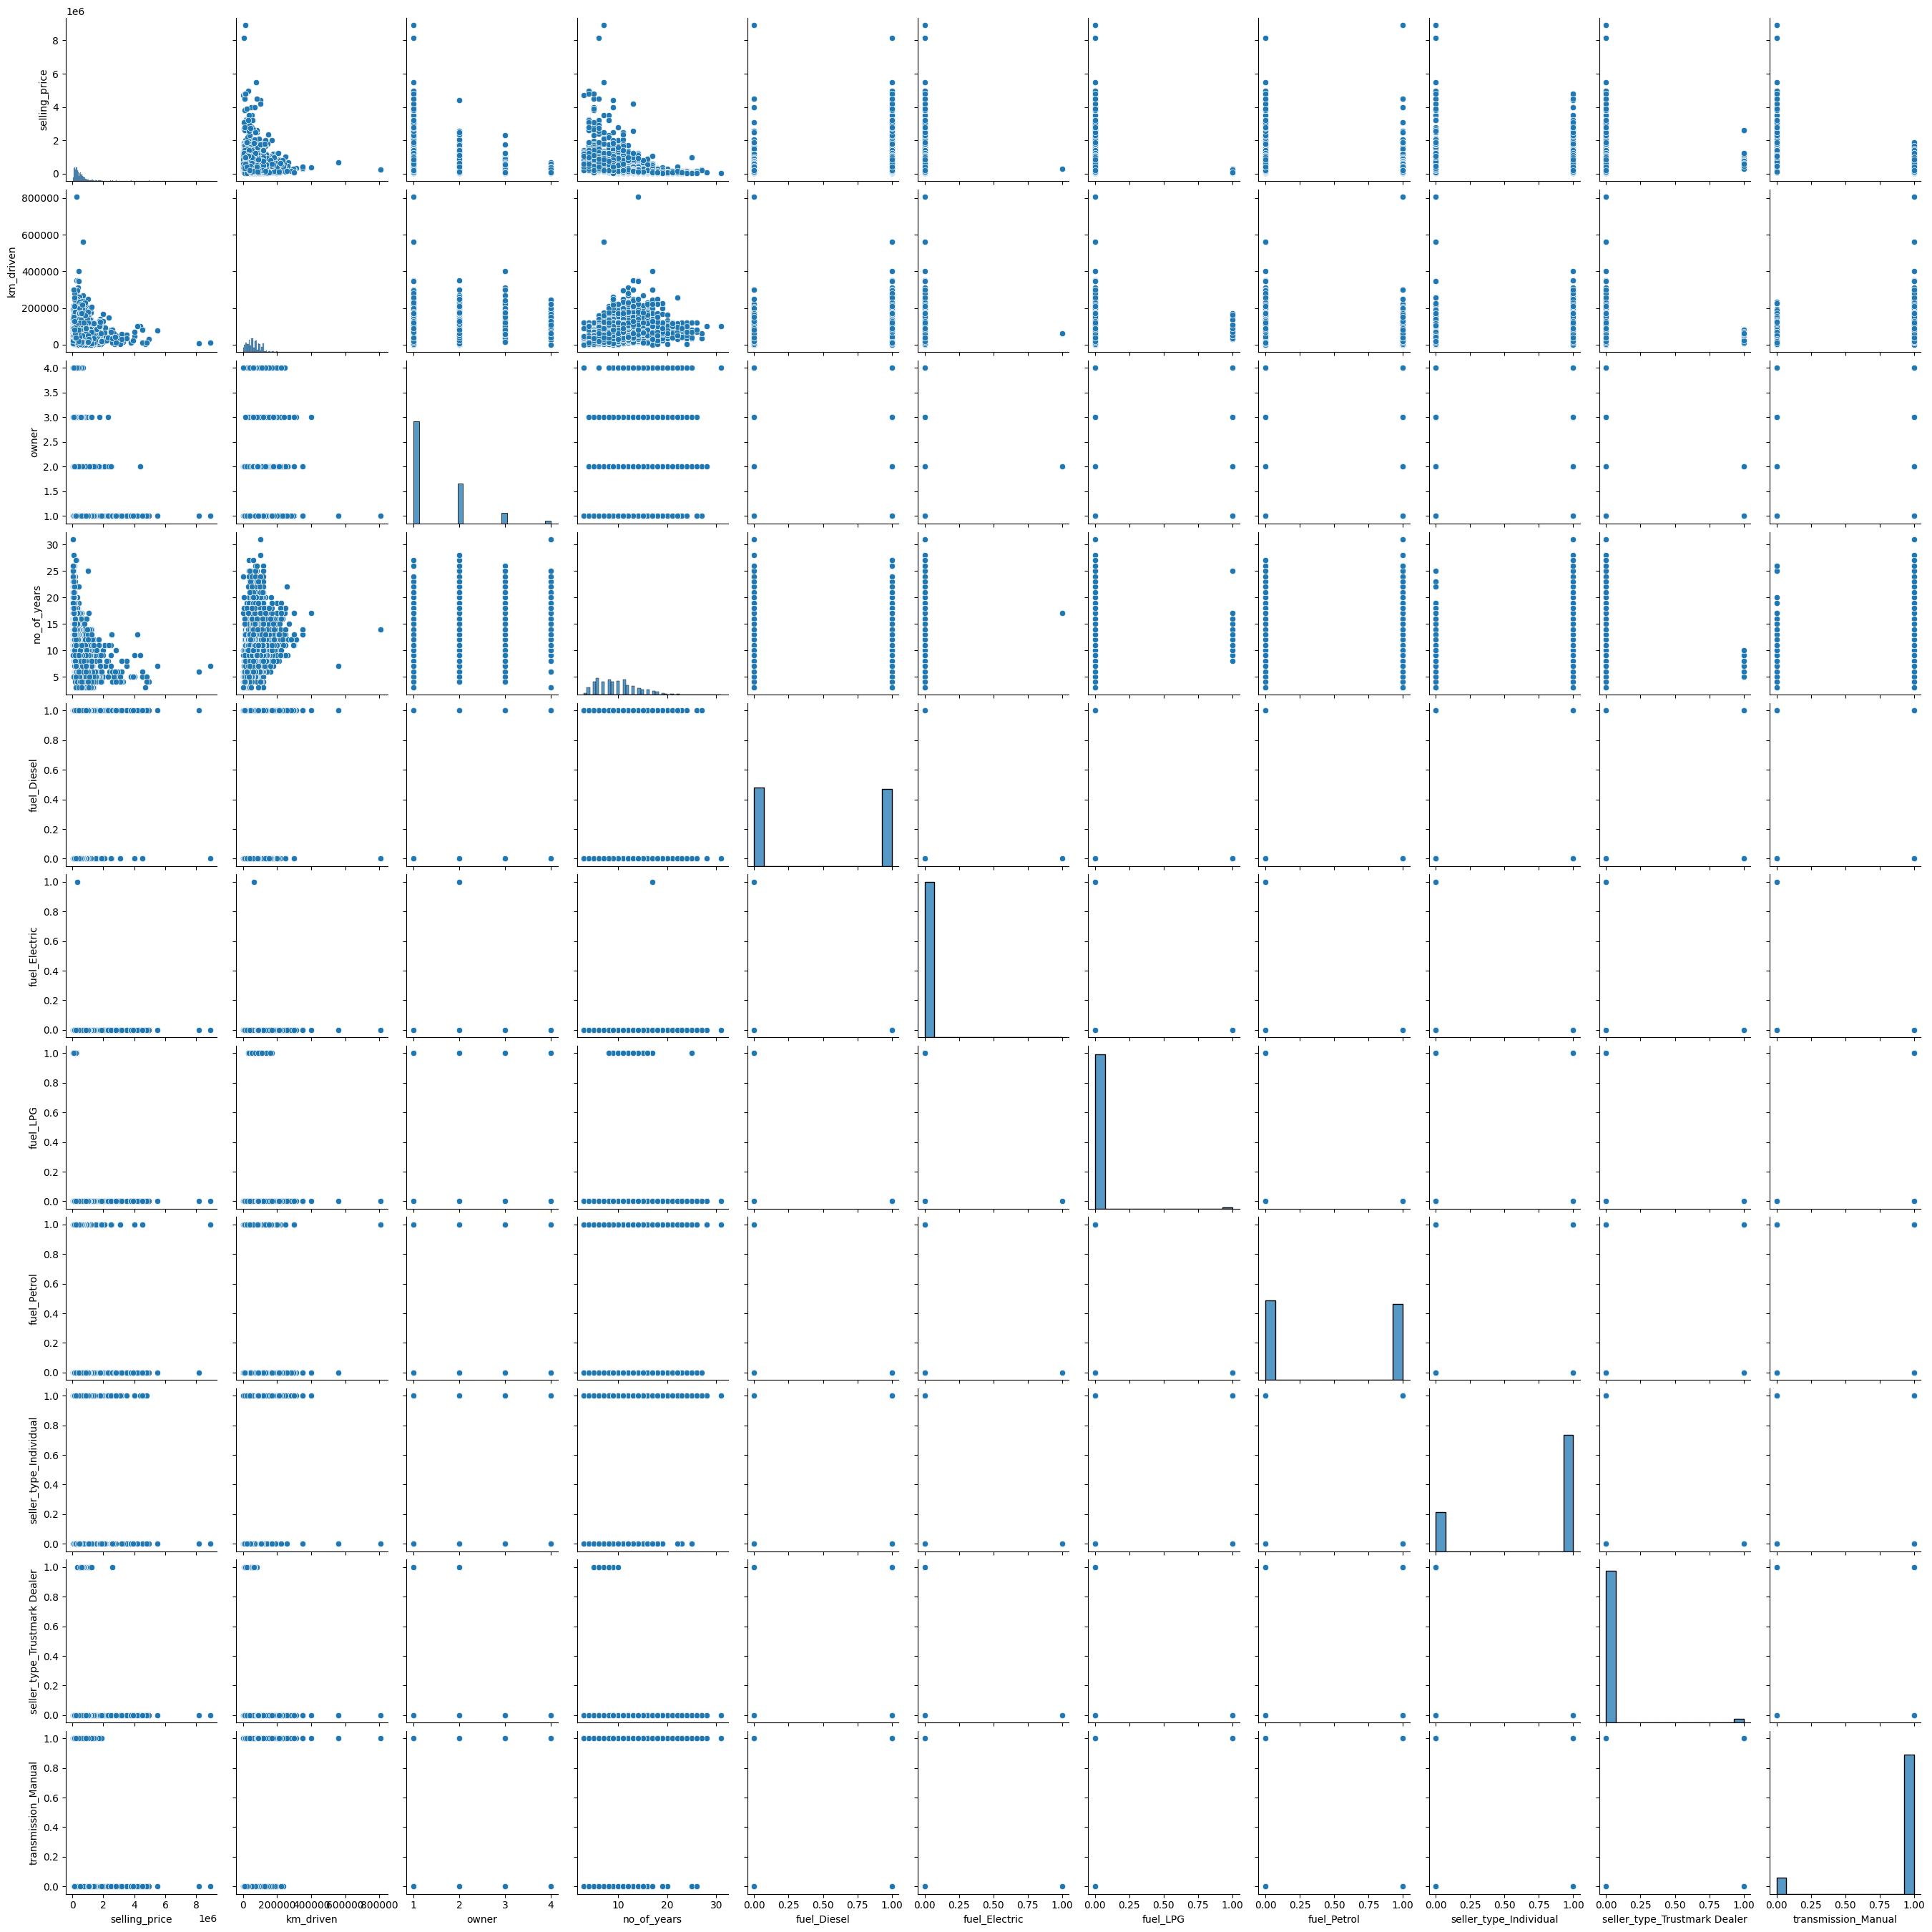

In [35]:
sns.pairplot(df_final)

In [37]:
y = df_final['selling_price']
X = df_final.drop('selling_price',axis=1)

In [38]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int32

In [39]:
X.head()

,km_driven,owner,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,70000,1,16,0,0,0,1,1,0,1
1,50000,1,16,0,0,0,1,1,0,1
2,100000,1,11,1,0,0,0,1,0,1
3,46000,1,6,0,0,0,1,1,0,1
4,141000,2,9,1,0,0,0,1,0,1


In [40]:
import matplotlib.pyplot as plt

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
regressor=RandomForestRegressor()

In [47]:
import numpy as np

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [49]:
from sklearn.model_selection import RandomizedSearchCV



In [50]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [54]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state= 42, n_jobs = 1)  

In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.1s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.9s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.9s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.9s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.8s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.7s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.8s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.9s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.7s
[CV] END max_depth=5, max_feat

c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.4s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.4s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.4s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.5s


c:\Data science\ml projects\Car_price_prediction\carenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [57]:
rf_random.best_score_

-128231287436.04224

In [58]:
predictions=rf_random.predict(X_test)

C:\Users\jayku\AppData\Local\Temp\ipykernel_23248\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='selling_price', ylabel='Density'>

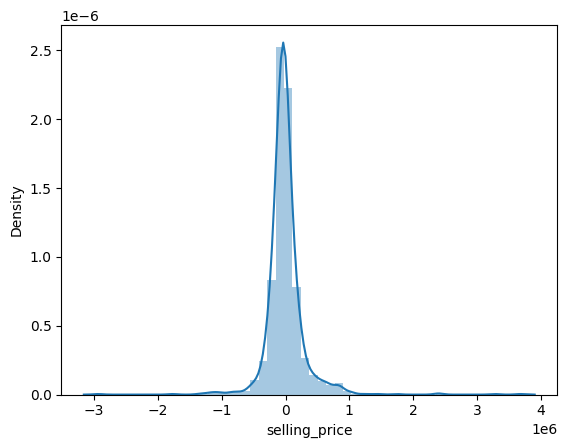

In [59]:
sns.distplot(y_test-predictions)

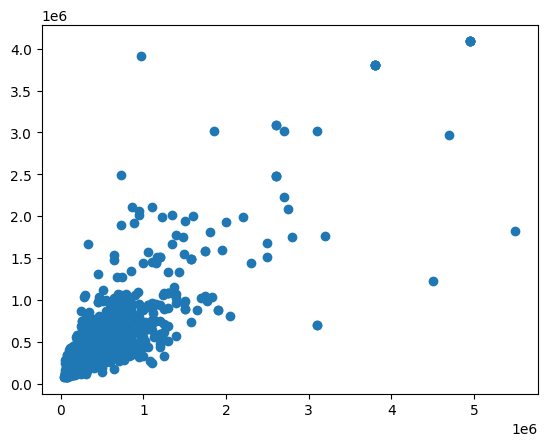

In [60]:
plt.scatter(y_test,predictions)

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 169127.1198868562
MSE: 99155411867.28336
RMSE: 314889.52327329555


In [63]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)